<a href="https://colab.research.google.com/github/ankitkush1487/Machine-Learning/blob/main/Bagging_%26_Boosting_KNN_%26_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

The fundamental idea of ensemble techniques is to combine multiple models to improve accuracy and robustness compared to a single model. Bagging and boosting differ in their approach: bagging trains models in parallel on random data subsets to reduce variance, while boosting trains models sequentially, with each new model correcting the errors of its predecessors, thereby focusing on reducing bias.

**Bagging (Bootstrap Aggregating)**

Approach: Trains multiple base models independently and in parallel on different random subsets of the training data (created via bootstrapping).

Objective: To reduce the variance of a model and prevent overfitting by creating an ensemble of models that are less sensitive to the training data.

Prediction: Final predictions are made by averaging the results of all the individual models (e.g., averaging predictions for regression or majority voting for classification).

**Boosting**

Approach: Builds models sequentially. Each subsequent model is trained to focus on the data points that were misclassified by the previous models.

Objective: To reduce the bias of a model by iteratively correcting the errors of earlier models, creating a single, powerful model from a series of weak learners.

Prediction: Predictions are made by combining the outputs of all the models, often with a weighted average where more accurate models have a higher influence.

**Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process**

The Random Forest Classifier reduces overfitting compared to a single decision tree through the principles of ensemble learning and randomization.

Overfitting in a Single Decision Tree:
A single decision tree can easily overfit the training data by growing too deep and learning the noise or specific patterns present only in the training set. This leads to high variance and poor generalization performance on unseen data.

How Random Forest Reduces Overfitting:
Bagging (Bootstrap Aggregating): Random Forest builds multiple decision trees (an "ensemble") by training each tree on a different bootstrap sample of the original training data. This means each tree sees a slightly different subset of the data, introducing variation and reducing the impact of outliers or noise that might be present in a single training set.

Feature Randomness: At each node split within a decision tree, Random Forest considers only a random subset of the available features, instead of all features. This further decorrelates the individual trees, making them less prone to relying on the same strong features and thus reducing the overall variance of the ensemble.

Averaging/Voting: For classification tasks, the final prediction of a Random Forest is determined by majority voting among the individual trees. This aggregation process averages out the errors and biases of individual trees, leading to a more robust and generalized prediction. The "wisdom of the crowd" effect helps in canceling out the noise and specific patterns learned by individual, potentially overfit, trees.

Role of Key Hyperparameters:

n_estimators (Number of Trees): This hyperparameter controls the number of decision trees in the forest. Increasing n_estimators generally improves the model's robustness and reduces variance, as more trees contribute to the final prediction, further averaging out individual errors. However, a very large number can also increase computational cost without significant performance gains.
max_features (Number of Features to Consider at Each Split): This hyperparameter controls the size of the random subset of features considered at each split point in a tree. A smaller max_features value increases the randomness and decorrelation among trees, which is crucial for reducing overfitting. Common choices include sqrt(n_features) or log2(n_features). If max_features is set too high (e.g., equal to the total number of features), the trees become more correlated, potentially diminishing the overfitting reduction benefits.

**Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**


Stacking, or stacked generalization, is an ensemble learning technique that combines the predictions of multiple diverse models (base models) using a meta-learner (or final estimator) to make a more accurate final prediction. The base models are trained on the original dataset, and their predictions become the input features for the meta-learner, which then learns how to optimally combine these predictions.

Differences from Traditional Bagging/Boosting Methods:

Model Diversity:
Stacking: Utilizes heterogeneous base models (different algorithms like Decision Trees, Logistic Regression, SVMs) to capture different aspects of the data.

Bagging/Boosting: Primarily use homogeneous base models (often the same type of weak learner, like decision trees). Bagging achieves diversity through different subsets of data, while Boosting focuses on iteratively correcting errors.

Training Approach:

Stacking: Base models are trained independently, and their predictions are then combined by a separate meta-learner.
Bagging: Base models are trained in parallel on bootstrap samples of the data.

Boosting: Base models are trained sequentially, with each subsequent model focusing on correcting the errors of the previous ones.

Combination Method:
Stacking: Uses a trainable meta-learner to learn the optimal combination of base model predictions.

Bagging: Combines predictions through averaging (regression) or voting (classification).

Boosting: Combines predictions using weighted averages based on the performance of individual models.

Simple Example Use Case:
Consider a customer churn prediction problem.

Base Models: Train a Logistic Regression model, a Support Vector Machine (SVM), and a Random Forest Classifier on the customer data to predict churn.

Meta-learner Input: The predictions (probabilities or class labels) from these three base models for each customer are collected.

Meta-learner: A simple Logistic Regression or a Gradient Boosting Classifier is trained on these predictions (from the base models) to make the final churn prediction. The meta-learner learns which base model's predictions are more reliable in different scenarios and how to combine them for optimal accuracy. This allows leveraging the strengths of each individual model to achieve a potentially more robust and accurate overall prediction.

**Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**



The OOB (out-of-bag) score is a performance metric in Random Forest that evaluates the model using data not used for training individual trees. It is useful because it provides an unbiased estimate of the model's generalization error without needing a separate validation set, effectively acting as a built-in cross-validation. This is possible because each tree is trained on a bootstrap sample, leaving about 36% of the data as "out-of-bag" for each tree.

How it works
Bootstrap sampling: During training, each decision tree in the forest is trained on a random subset of the original data, sampled with replacement.

Out-of-bag data: For each tree, the data points that were not included in its bootstrap sample are called the out-of-bag (OOB) samples.

OOB prediction: After each tree is trained, it is used to make a prediction on the OOB data points that were not seen during its training.

Aggregation: For each data point, the final prediction is determined by a majority vote from all the trees that did not use that point in their training.

Score calculation: The OOB score is calculated by comparing these final OOB predictions to the actual labels of the OOB data points.

Why it is useful
No need for a separate validation set: The OOB method provides a reliable performance estimate that is equivalent to a validation set, saving the effort of splitting the data and reducing the amount of data available for training.

Unbiased performance estimate: Since the OOB data was not used for training any of the trees, the predictions made on this data are a good measure of how the model will perform on new, unseen data.
Built-in validation: The OOB score can be used to tune the model's hyperparameters and can be tracked as a performance metric throughout the training process.

**Question 5: Compare AdaBoost and Gradient Boosting in terms of:**
**● How they handle errors from weak learners**
**● Weight adjustment mechanism**
**● Typical use cases**


AdaBoost

Focuses on misclassified samples from the previous weak learner.

In each iteration, samples that were misclassified get higher weights, forcing the next weak learner to pay more attention to those mistakes.

Tries to correct classification errors directly by reweighting samples.

Gradient Boosting

Focuses on errors (residuals) of the previous model, not misclassification specifically.

Each new weak learner fits the residuals, i.e., the difference between the predicted and actual values.

It performs gradient descent on the loss function, reducing error step by step.

2. Weight Adjustment Mechanism
AdaBoost

Assigns higher weight to misclassified samples.

The weak learner’s weight (α) depends on its error rate:

Lower error → higher weight in final prediction.

Final output is a weighted majority vote (classification) or weighted sum.

Gradient Boosting

Does not adjust sample weights directly.

Instead, each model fits the negative gradient of the loss function.

Learners are combined using a learning rate (shrinkage) to slow down updates.

3. Typical Use Cases
AdaBoost

Works best with weak, simple learners (e.g., decision stumps).

Good for:

Binary classification

Face detection

Spam detection

When data is not too noisy (AdaBoost is sensitive to noise)

Gradient Boosting

More flexible and powerful.

Good for:

Regression problems

Classification (binary/multi-class)

Structured/tabular data

Competitions (Kaggle)

Variants like XGBoost, LightGBM, CatBoost make it widely used.

**Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

CatBoost performs well on categorical features without extensive preprocessing because it handles them natively and automatically converts them into numerical values using specialized techniques during training, thereby avoiding common issues like data leakage and high-dimensionality.

Handling of Categorical Variables
CatBoost uses an innovative approach centered on two main strategies:

Ordered Target Encoding: This is the primary method for converting high-cardinality categorical features into numerical values. To prevent target leakage (where the model inadvertently uses information from the target variable to predict the target, leading to overfitting), CatBoost employs a dynamic, "online" calculation:

It creates a random permutation of the training data.
For each data point, the numerical value for a categorical feature is calculated using only the historical data points that come before it in the specific random permutation.
This approach mimics a streaming or time-series data scenario, ensuring that the current observation's target value is not used to create its own feature value, thus reducing overfitting and improving model generalization.

A prior (a combination of the global mean of the target and the mean of the target for the specific category) is also introduced to handle categories with few observations and provide more robust statistics.
One-Hot Encoding for Low Cardinality Features: For categorical features with a small number of unique values (the default threshold is often 255 for GPU training, but can be set by the user using one_hot_max_size), CatBoost uses standard one-hot encoding.

Automatic Feature Combinations: CatBoost can automatically combine multiple categorical features to create new, more informative features, capturing complex interactions within the data without manual feature engineering. These combinations are also encoded on the fly.

This native, robust handling of categorical features allows CatBoost to provide excellent out-of-the-box performance and saves significant time and effort in the data preprocessing phase.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions






In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- Unscaled KNN Classifier (K=5) ---")
# 3. Train a KNN classifier (default K=5) without scaling and evaluate
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate unscaled KNN
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy (Unscaled): {accuracy_unscaled:.4f}")
print("Classification Report (Unscaled):")
print(classification_report(y_test, y_pred_unscaled, target_names=wine.target_names))

print("\n--- Scaled KNN Classifier (K=5) ---")
# 4. Apply StandardScaler, retrain KNN, and compare metrics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate scaled KNN
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy (Scaled): {accuracy_scaled:.4f}")
print("Classification Report (Scaled):")
print(classification_report(y_test, y_pred_scaled, target_names=wine.target_names))

print("\n--- Optimized KNN Classifier using GridSearchCV ---")
# 5. Use GridSearchCV to find the best K and distance metric
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Test K from 1 to 20
    'metric': ['euclidean', 'manhattan']  # Test Euclidean and Manhattan distance
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train) # Use scaled data for GridSearchCV

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
print(f"Best K: {best_k}")
print(f"Best Metric: {best_metric}")
print(f"Best Score from GridSearchCV: {grid_search.best_score_:.4f}")

# 6. Train the optimized KNN and compare results
knn_optimized = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_optimized.fit(X_train_scaled, y_train)
y_pred_optimized = knn_optimized.predict(X_test_scaled)

# Evaluate optimized KNN
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Accuracy (Optimized): {accuracy_optimized:.4f}")
print("Classification Report (Optimized):")
print(classification_report(y_test, y_pred_optimized, target_names=wine.target_names))

print("\n--- Comparison of Results ---")
print(f"Accuracy (Unscaled, K=5): {accuracy_unscaled:.4f}")
print(f"Accuracy (Scaled, K=5): {accuracy_scaled:.4f}")
print(f"Accuracy (Optimized, K={best_k}, Metric={best_metric}): {accuracy_optimized:.4f}")

--- Unscaled KNN Classifier (K=5) ---
Accuracy (Unscaled): 0.7407
Classification Report (Unscaled):
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


--- Scaled KNN Classifier (K=5) ---
Accuracy (Scaled): 0.9630
Classification Report (Scaled):
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


--- Optimized KNN Classifier using GridSea

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


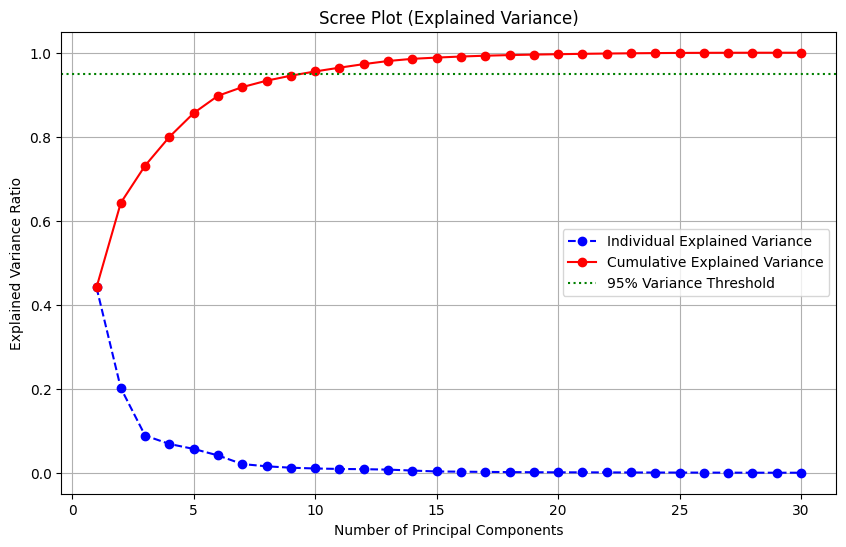

Number of components to retain 95% variance: 10
Accuracy on Original Data: 0.9708
Accuracy on PCA-transformed Data (95% variance): 0.9532


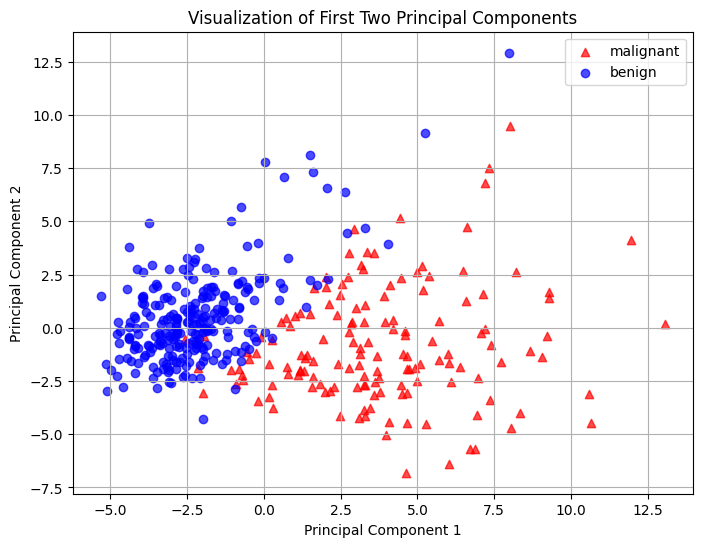

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# Standardize the data (crucial for PCA and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Apply PCA and plot the scree plot
# Apply PCA with all components to analyze variance
pca_full = PCA(n_components=None)
pca_full.fit(X_train_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='blue', label='Individual Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='red', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Explained Variance)')
plt.axhline(y=0.95, color='green', linestyle=':', label='95% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

# 3. Retain 95% variance and transform the dataset
# Scikit-learn PCA can take a float (0.0 to 1.0) as n_components to retain that percentage of variance
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)

num_components = pca_95.n_components_
print(f"Number of components to retain 95% variance: {num_components}")

# 4. Train KNN on original and PCA-transformed data, then compare accuracy
# KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5) # n_neighbors can be tuned
knn_original.fit(X_train_scaled, y_train)
y_pred_original = knn_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)

# KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy on Original Data: {accuracy_original:.4f}")
print(f"Accuracy on PCA-transformed Data (95% variance): {accuracy_pca:.4f}")

# 5. Visualize the first two principal components using a scatter plot
# We need to re-run PCA to specifically get only the first two components for visualization (if num_components > 2)
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
# Scatter plot, color by class (benign/malignant)
for target_value, color, marker in zip([0, 1], ['red', 'blue'], ['^', 'o']):
    plt.scatter(
        X_train_pca2[y_train == target_value, 0],
        X_train_pca2[y_train == target_value, 1],
        c=color,
        label=target_names[target_value],
        marker=marker,
        alpha=0.7
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()


Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


MSE with Euclidean distance (K=5): 4600.79
MSE with Manhattan distance (K=5): 5425.15


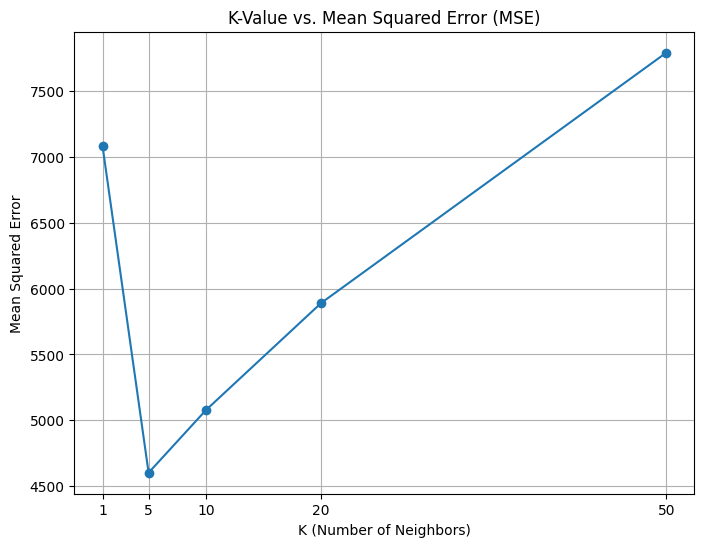


Analysis of Bias-Variance Tradeoff:
Low K (e.g., K=1): High variance, low bias. Model is highly sensitive to noise in training data.
High K (e.g., K=50): Low variance, high bias. Model is more stable but may oversimplify the underlying relationship.
The plot of K vs. MSE visually demonstrates this tradeoff, where an optimal K value often minimizes MSE, balancing bias and variance.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train KNN regressors with different distance metrics (K=5)
# a. Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# c. Compare Mean Squared Error (MSE) for both
print(f"MSE with Euclidean distance (K=5): {mse_euclidean:.2f}")
print(f"MSE with Manhattan distance (K=5): {mse_manhattan:.2f}")

# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, p=2)  # Using Euclidean for this analysis
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o')
plt.title('K-Value vs. Mean Squared Error (MSE)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Analysis of bias-variance tradeoff
print("\nAnalysis of Bias-Variance Tradeoff:")
print("Low K (e.g., K=1): High variance, low bias. Model is highly sensitive to noise in training data.")
print("High K (e.g., K=50): Low variance, high bias. Model is more stable but may oversimplify the underlying relationship.")
print("The plot of K vs. MSE visually demonstrates this tradeoff, where an optimal K value often minimizes MSE, balancing bias and variance.")

Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# 1. Load the Pima Indians Diabetes dataset (contains missing values).
# The dataset can be loaded from a public URL or a local file.
# Assuming the dataset is available at a common URL or you have it locally.
try:
    df = pd.read_csv('pima-indians-diabetes.csv', header=None)
except FileNotFoundError:
    print("Pima Indians Diabetes dataset not found. Please ensure 'pima-indians-diabetes.csv' is in the same directory or provide the correct path.")
    exit()

# The Pima dataset often represents missing values as 0 in certain columns.
# We replace these 0s with NaN for proper imputation.
cols_with_zeros_as_nan = [1, 2, 3, 4, 5] # Glucose, BloodPressure, SkinThickness, Insulin, BMI
df[cols_with_zeros_as_nan] = df[cols_with_zeros_as_nan].replace(0, np.nan)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.3, random_state=42)

# 3. Train KNN using: a. Brute-force method, b. KD-Tree, c. Ball Tree
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    print(f"\nTraining KNN with algorithm='{method}'...")
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[method] = {'training_time': training_time, 'accuracy': accuracy}

# 4. Compare their training time and accuracy.
print("\n--- KNN Training Time and Accuracy Comparison ---")
for method, data in results.items():
    print(f"Method: {method}")
    print(f"  Training Time: {data['training_time']:.4f} seconds")
    print(f"  Accuracy: {data['accuracy']:.4f}")

# Determine the best-performing method based on accuracy (and then speed if tie)
best_method = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest performing method: {best_method} with accuracy: {results[best_method]['accuracy']:.4f}")

# 5. Plot the decision boundary for the best-performing method (use 2 most important features).
# For simplicity, we'll use the first two features as "most important".
# In a real-world scenario, feature importance would be determined through analysis.
feature_names = df.columns[:-1]
feature_indices = [0, 1] # Using the first two features for plotting (e.g., Pregnancies, Glucose)

X_plot = X_imputed_df.iloc[:, feature_indices].values
y_plot = y.values

# Retrain the best model on the two selected features for plotting
best_knn_plot = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
best_knn_plot.fit(X_plot, y_plot)

plt.figure(figsize=(10, 8))
plot_decision_regions(X_plot, y_plot, clf=best_knn_plot, legend=2)
plt.xlabel(feature_names[feature_indices[0]])
plt.ylabel(feature_names[feature_indices[1]])
plt.title(f'KNN Decision Boundary ({best_method} algorithm) with {feature_names[feature_indices[0]]} and {feature_names[feature_indices[1]]}')
plt.show()